<a href="https://colab.research.google.com/github/aaguil8a/sales_predictions/blob/main/sales_predictions_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# % pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
# import pandas_profiling as pdpf


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
filename = 'https://raw.githubusercontent.com/aaguil8a/DS/main/sales_predictions%20(1).csv'

df = pd.read_csv(filename, index_col=7, parse_dates=True)

df.head(30)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Outlet_Establishment_Year,,,,,,,,,,,
1999-01-01,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
2009-01-01,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
1999-01-01,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
1998-01-01,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800
1987-01-01,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052
2009-01-01,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,Medium,Tier 3,Supermarket Type2,556.6088
1987-01-01,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,High,Tier 3,Supermarket Type1,343.5528
1985-01-01,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,Medium,Tier 3,Supermarket Type3,4022.7636
2002-01-01,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,NaN,Tier 2,Supermarket Type1,1076.5986


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8523 entries, 1999-01-01 to 1997-01-01
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           7060 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Item_MRP              8523 non-null   float64
 6   Outlet_Identifier     8523 non-null   object 
 7   Outlet_Size           6113 non-null   object 
 8   Outlet_Location_Type  8523 non-null   object 
 9   Outlet_Type           8523 non-null   object 
 10  Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), object(7)
memory usage: 799.0+ KB


In [4]:
df.shape

(8523, 11)

In [5]:
df.T

Outlet_Establishment_Year,1999-01-01,2009-01-01,1999-01-01,1998-01-01,1987-01-01,2009-01-01,1987-01-01,1985-01-01,2002-01-01,2007-01-01,1999-01-01,1997-01-01,1999-01-01,1997-01-01,1987-01-01,1997-01-01,2009-01-01,1999-01-01,1985-01-01,2004-01-01,1987-01-01,1985-01-01,2004-01-01,1985-01-01,1997-01-01,2007-01-01,2004-01-01,1987-01-01,1998-01-01,1985-01-01,1998-01-01,2009-01-01,2009-01-01,2002-01-01,1997-01-01,1999-01-01,1985-01-01,2009-01-01,1985-01-01,1985-01-01,...,2002-01-01,1987-01-01,1985-01-01,1998-01-01,1985-01-01,1985-01-01,2009-01-01,1985-01-01,2009-01-01,1997-01-01,2007-01-01,2007-01-01,2004-01-01,2007-01-01,2004-01-01,2009-01-01,2004-01-01,2007-01-01,2007-01-01,2002-01-01,2004-01-01,1985-01-01,2009-01-01,2009-01-01,2004-01-01,2002-01-01,1998-01-01,2004-01-01,2009-01-01,1987-01-01,2004-01-01,2002-01-01,2009-01-01,2009-01-01,1997-01-01,1987-01-01,2002-01-01,2004-01-01,2009-01-01,1997-01-01
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19,FDP36,FDO10,FDP10,FDH17,FDU28,FDY07,FDA03,FDX32,FDS46,FDF32,FDP49,NCB42,FDP49,DRI11,FDU02,FDN22,FDW12,NCB30,FDC37,FDR28,NCD06,FDV10,DRJ59,FDE51,FDC14,FDV38,NCS17,FDP33,FDO23,DRH01,NCX29,FDV20,DRZ11,FDX10,FDB34,...,DRI11,DRJ49,DRK37,FDR20,DRG13,NCN14,FDV13,FDU44,FDO03,FDT34,FDP21,NCI54,FDE22,FDJ57,FDT08,NCP54,NCK53,NCQ42,FDW21,NCH43,FDQ44,NCN18,FDB46,DRF37,FDN28,FDW31,FDG45,FDN58,FDF05,FDR26,FDH31,FDA01,FDH24,NCJ19,FDF53,FDF22,FDS36,NCJ29,FDN46,DRG01
Item_Weight,9.3,5.92,17.5,19.2,8.93,10.395,13.65,NaN,16.2,19.2,11.8,18.5,15.1,17.6,16.35,9,11.8,9,NaN,13.35,18.85,NaN,14.6,NaN,13.85,13,7.645,11.65,5.925,NaN,19.25,18.6,18.7,17.85,17.5,10,NaN,8.85,NaN,NaN,...,8.26,6.865,NaN,20,NaN,NaN,17.35,NaN,10.395,9.3,7.42,15.2,9.695,7.42,13.65,15.35,11.6,20.35,5.34,8.42,20.5,NaN,10.5,17.25,5.88,11.35,8.1,13.8,17.5,20.7,12,15,20.7,18.6,20.75,6.865,8.38,10.6,7.21,14.8
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Low Fat,Regular,Regular,Low Fat,Regular,Regular,Low Fat,Regular,Regular,Regular,Low Fat,Regular,Low Fat,Regular,Low Fat,Low Fat,Regular,Regular,Low Fat,Low Fat,Regular,Low Fat,Regular,low fat,Regular,Regular,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Low Fat,Regular,Regular,Regular,Low Fat,...,Low Fat,Low Fat,Low Fat,Regular,Low Fat,Low Fat,Regular,Regular,Regular,Low Fat,Regular,Low Fat,Low Fat,Regular,Low Fat,Low Fat,Low Fat,Low Fat,Regular,Low Fat,Low Fat,Low Fat,Regular,Low Fat,Regular,Regular,Low Fat,Regular,Low Fat,Low Fat,Regular,Regular,Low Fat,Low Fat,reg,Low Fat,Regular,Low Fat,Regular,Low Fat
Item_Visibility,0.0160473,0.0192782,0.0167601,0,0,0,0.0127411,0.12747,0.0166871,0.0944496,0,0.0454638,0.100014,0.0472573,0.0680243,0.069089,0.00859605,0.0691964,0.0342377,0.102492,0.13819,0.0353999,0.0256981,0.057557,0.0258965,0.0998871,0.0666934,0.0193561,0.161467,0.0722218,0.170349,0.0808294,0,0,0.097904,0.0892911,0.0595118,0.113124,0.123111,0.026481,...,0.0344741,0,0.0437916,0,0.0370061,0.0914727,0.0277233,0.102296,0.0370332,0.17435,0.0258864,0,0.0295672,0.0216957,0.0492092,0.0352929,0.0375741,0,0.00599762,0.070712,0.0361335,0.124111,0.0941458,0.0846762,0.0302422,0.0432456,0.214306,0.0568616,0.0269804,0.0428011,0.0204073,0.0544885,0.0215184,0.118661,0.0836066,0.0567834,0.0469824,0.0351863,0.145221,0.0448783
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household,Baking Goods,Snack Foods,Snack Foods,Frozen Foods,Frozen Foods,Fruits and Vegetables,Dairy,Fruits and Vegetables,Snack Foods,Fruits and Vegetables,Breakfast,Health and Hygiene,Breakfast,Hard Drinks,Dairy,Snack Foods,Baking Goods,Household,Baking Goods,Frozen Foods,Household,Snack Foods,Hard Drinks,Dairy,Canned,Dairy,Health and Hygiene,Snack Foods,Breads,Soft Drinks,Health and Hygiene,Fruits and Vegetables,Soft Drinks,Snack Foods,Snack Foods,...,Hard Drinks,Soft Drinks,Soft Drinks,Fruits and Vegetables,Soft Drinks,Others,Canned,Fruits and Vegetables,Meat,Snack Foods,Snack Foods,Household,Snack Foods,Seafood,Fruits and Vegetables,Household,Health and Hygiene,Household,Snack Foods,Household,Fruits and Vegetables,Household,Snack Foods

In [6]:
# Removes white spaces from dataframe

def remove_whitespace(x):
    try:
        # remove spaces inside and outside of string
        x = "_".join(x.split())

    except:
        pass
    return x


df = df.applymap(remove_whitespace)

df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Outlet_Establishment_Year,,,,,,,,,,,
1999-01-01,FDA15,9.300,Low_Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier_1,Supermarket_Type1,3735.1380
2009-01-01,DRC01,5.920,Regular,0.019278,Soft_Drinks,48.2692,OUT018,Medium,Tier_3,Supermarket_Type2,443.4228
1999-01-01,FDN15,17.500,Low_Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier_1,Supermarket_Type1,2097.2700
1998-01-01,FDX07,19.200,Regular,0.000000,Fruits_and_Vegetables,182.0950,OUT010,NaN,Tier_3,Grocery_Store,732.3800
1987-01-01,NCD19,8.930,Low_Fat,0.000000,Household,53.8614,OUT013,High,Tier_3,Supermarket_Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
1987-01-01,FDF22,6.865,Low_Fat,0.056783,Snack_Foods,214.5218,OUT013,High,Tier_3,Supermarket_Type1,2778.3834
2002-01-01,FDS36,8.380,Regular,0.046982,Baking_Goods,108.1570,OUT045,NaN,Tier_2,Supermarket_Type1,549.2850
2004-01-01,NCJ29,10.600,Low_Fat,0.035186,Health_and_Hygiene,85.1224,OUT035,Small,Tier_2,Supermarket_Type1,1193.1136


# Data Cleaning 


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8523 entries, 1999-01-01 to 1997-01-01
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           7060 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Item_MRP              8523 non-null   float64
 6   Outlet_Identifier     8523 non-null   object 
 7   Outlet_Size           6113 non-null   object 
 8   Outlet_Location_Type  8523 non-null   object 
 9   Outlet_Type           8523 non-null   object 
 10  Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), object(7)
memory usage: 799.0+ KB


In [8]:
df.shape # 8524 rows and 12 columns

(8523, 11)

In [9]:
# Count duplicate on a column 
print(df.duplicated().sum())

# # non-duplicates
print((~df.duplicated()).sum())




0
8523


In [10]:
# missing data
# Gives you missing percent of data
# Here we see that there is 17 of data missing from item_Weight
# We also see that there is 28 percent of data missing from outlet_size
((df
  .isna()
  .mean()
  * 100)
  .pipe(lambda ser : ser[ser > 0])
)



Item_Weight    17.165317
Outlet_Size    28.276428
dtype: float64

In [11]:
# Checks for more missing values that may not have been picked up

missing_values = ['NaN','na','--','n/a']

# Saving those possible missing values back into dataframe
df = pd.read_csv(filename,na_values=missing_values)


In [12]:
# sum of missing values

df.isnull().sum()




Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
# total number of missing values

df.isnull().sum().sum()

3873

In [14]:
df.Outlet_Size.describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

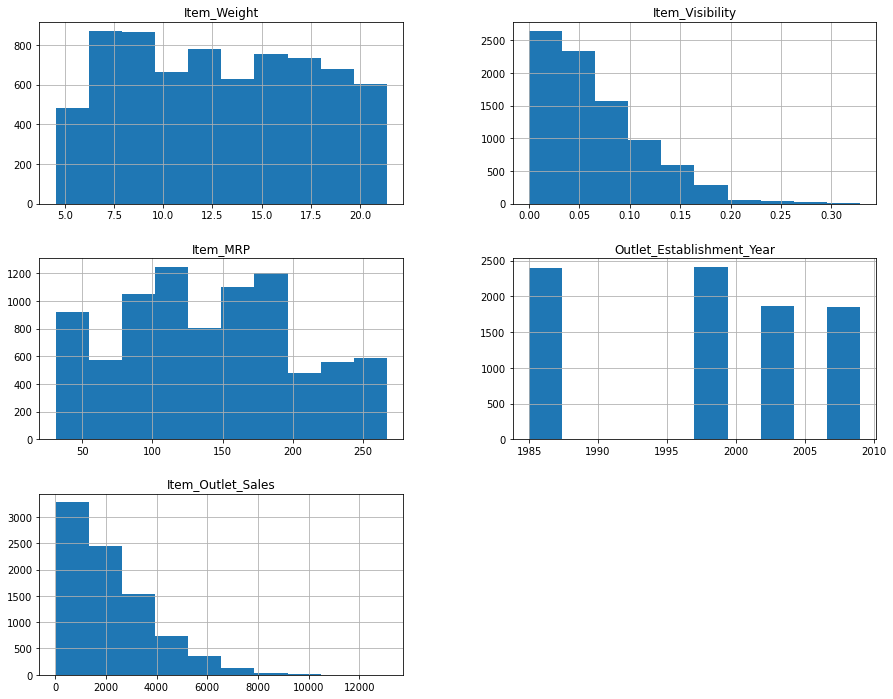

In [15]:
df.hist(figsize=(15,12));

In [16]:
# use mode for outlet size
# Given mode shows us repeated values occurting

# turn into numeric and then fill in with mode
df['Outlet_size'] = df['Outlet_Size'].map({"Small": 1, "Medium": 2, "High":3})

df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

# use median for item weight, given that is some extreme values end of range
# this will fill in Item_Weight missing values with median     
df.fillna(df.median(), inplace=True)




In [17]:
df.isnull().sum() # No missing values



Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_size                  0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Outlet_size                8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [19]:
# Looking for inconsistent categories of data
# In the Item fat content, there is inconsistent categories

df.value_counts()


Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type              Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales  Outlet_size
NCZ54            14.650       Low Fat           0.083699         Household              163.4552  OUT018             2009                       Medium       Tier 3                Supermarket Type2  2599.2832          2.0            1
FDJ27            17.700       Regular           0.122565         Meat                   103.8674  OUT017             2007                       Medium       Tier 2                Supermarket Type1  1528.0110          2.0            1
FDJ22            12.600       Low Fat           0.092464         Snack Foods            190.9504  OUT019             1985                       Small        Tier 1                Grocery Store      383.5008           1.0            1
                 18.750       Low Fat           0.052800         Snac

In [20]:
# replace the inconsistent categories
# Assumed that LS means low fat
replacement = {'Low Fat': 'Low_Fat',
                'LF': 'Low_Fat',
               'reg': 'Regular',
               'low_Fat': 'Low_Fat',
               'low fat': 'Low_Fat'
    

}

df['Item_Fat_Content'].replace(replacement,inplace=True)




In [21]:
# Checked if it worked
# worked: now we have only two categories
df.Item_Fat_Content.value_counts()

Low_Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Data Visualization Numerical Columns 

In [22]:
# Statistics for numerical columns

x = df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']]

x.describe().loc[['min','max','mean']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,4.55500,0.000000,31.290000,1985.000000,33.290000
max,21.35000,0.328391,266.888400,2009.000000,13086.964800
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914


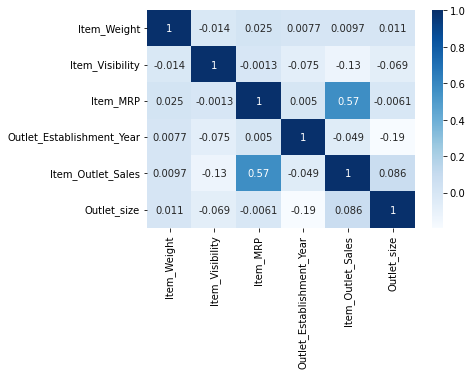

In [23]:
# We see that there correlation between: Item_MRP & Item_Outlet_Sales
corr = df.corr();
sns.heatmap(corr,cmap='Blues', annot=True);

In [24]:
(df
 .corr(method='spearman')
 .style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

# We see that outlet sales & visibility as a negative relationship: though not very strong

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_size
Item_Weight,1.000000,-0.008316,0.028555,-0.005996,0.014486,0.006603
Item_Visibility,-0.008316,1.000000,0.005688,-0.054924,-0.115076,-0.048495
Item_MRP,0.028555,0.005688,1.000000,0.003782,0.562986,-0.007575
Outlet_Establishment_Year,-0.005996,-0.054924,0.003782,1.000000,0.042947,-0.033920
Item_Outlet_Sales,0.014486,-0.115076,0.562986,0.042947,1.000000,0.105907
Outlet_size,0.006603,-0.048495,-0.007575,-0.033920,0.105907,1.000000


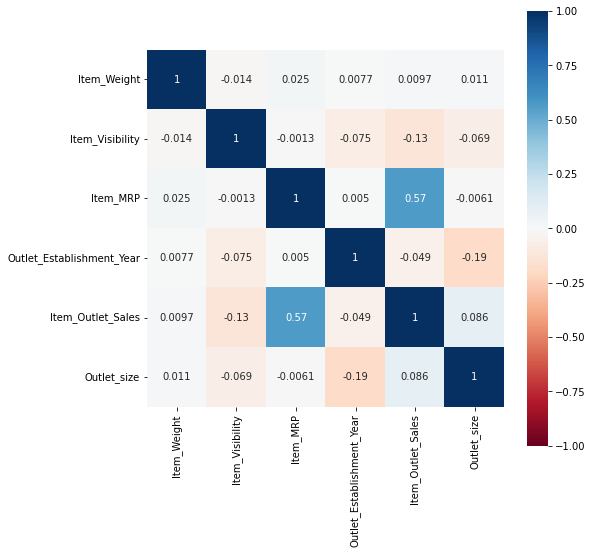

In [25]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True, square=True, ax=ax)

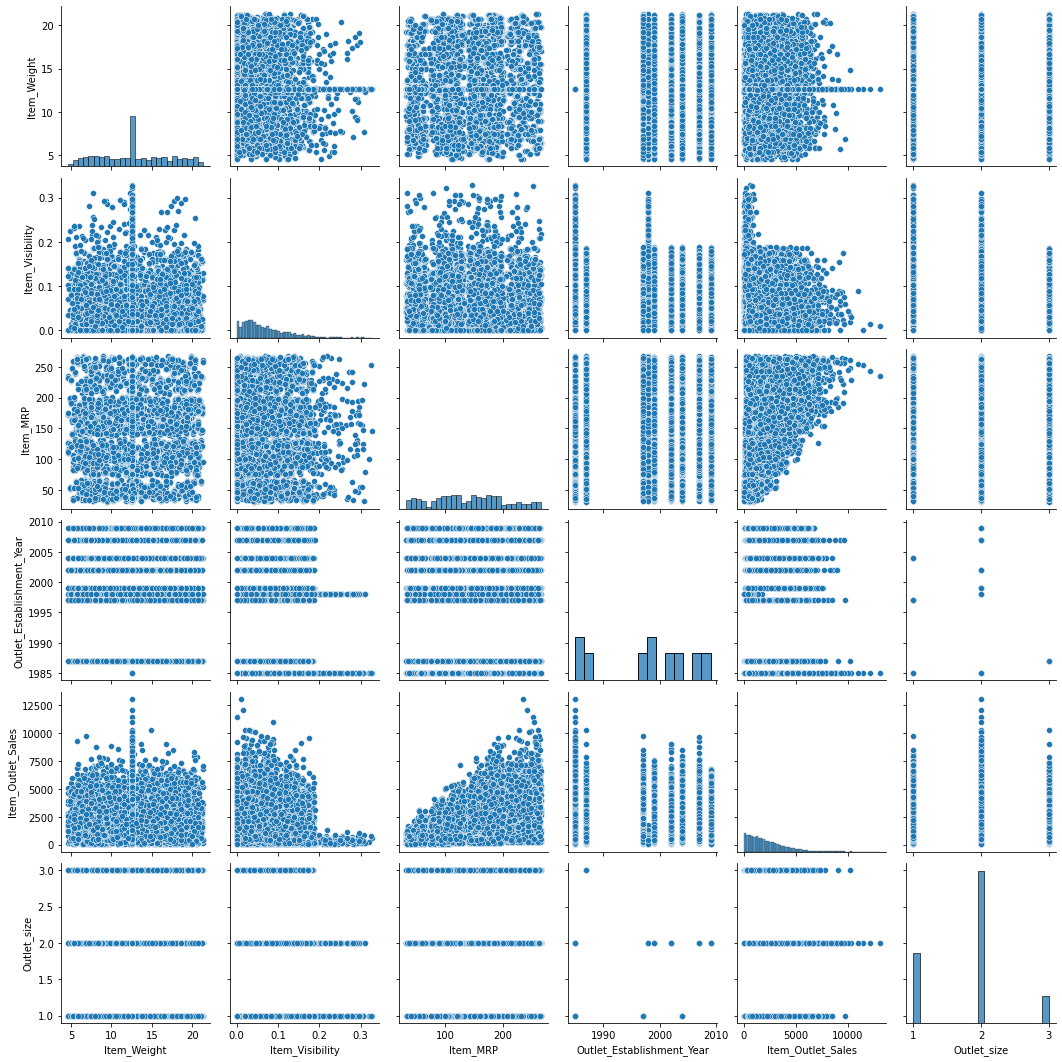

In [26]:
# we see a relationship between Item_MRP & Outlet sales 
sns.pairplot(df);


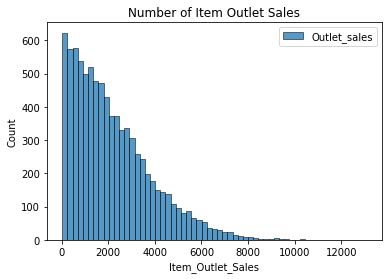

In [27]:
# lets explore 
sns.histplot(df['Item_Outlet_Sales'], label = 'Outlet_sales')
plt.title('Number of Item Outlet Sales')
plt.legend();

# we see a right tail distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


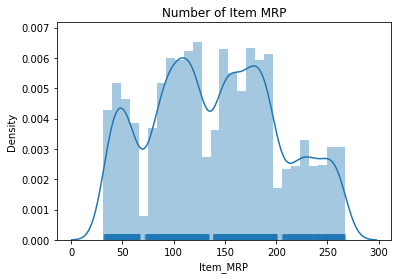

In [28]:
# There are several peaks with our Item_MRP
plt.title('Number of Item MRP');
sns.distplot(df.Item_MRP, rug=True, rug_kws={'alpha':.2});

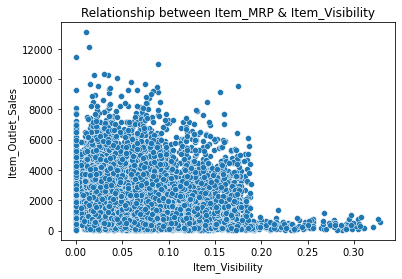

In [29]:

sns.scatterplot(y='Item_Outlet_Sales', x='Item_Visibility', data=df);
plt.title('Relationship between Item_MRP & Item_Visibility');

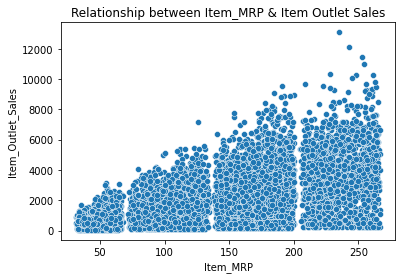

In [30]:
# looking at relationship: left skew
# given the mrp goes up, so does outlet sales
sns.scatterplot(y='Item_Outlet_Sales', x='Item_MRP', data=df);
plt.title('Relationship between Item_MRP & Item Outlet Sales');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


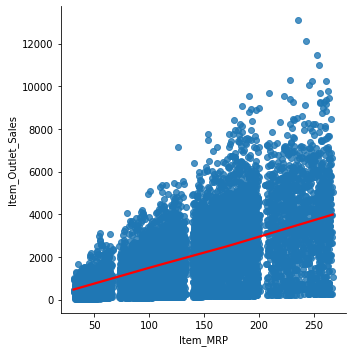

In [31]:
# When we fit line, we see that line fits well with given data
# Also, we see that line degree, which shows somewhat strong relationship
sns.lmplot('Item_MRP', 'Item_Outlet_Sales', data=df, lowess=True, line_kws={'color':'red'});

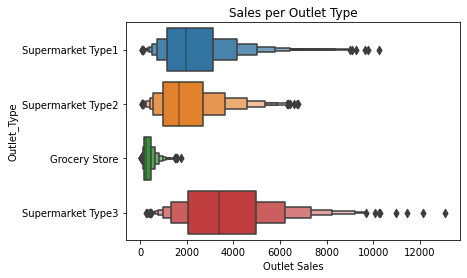

In [147]:

sns.boxenplot(x='Item_Outlet_Sales', y='Outlet_Type', data=df)
plt.xlabel('Outlet Sales')
plt.title('Sales per Outlet Type')
plt.show()

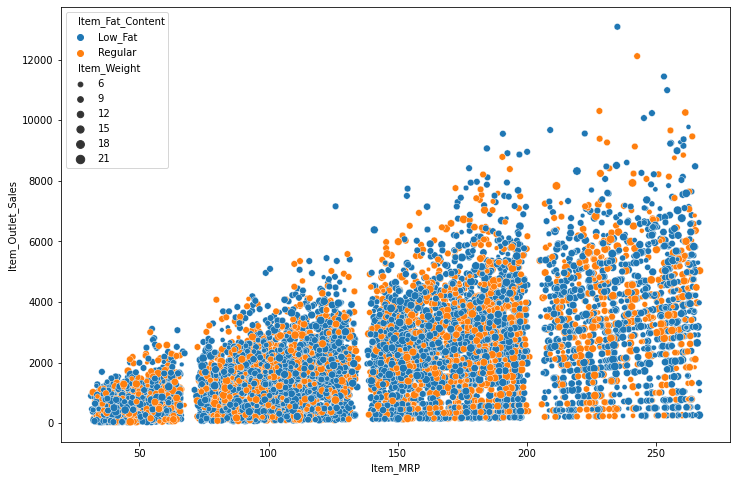

In [33]:
# If with include the points as item_weight we see that item weight is distributed evenly
# We also see the same for item fat content
fig,axes=plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight', data=df)

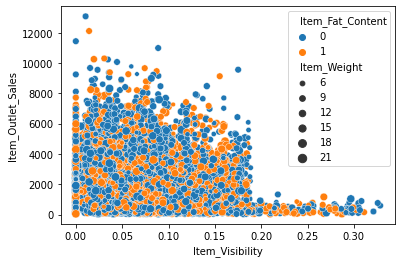

In [116]:
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight', data=df)

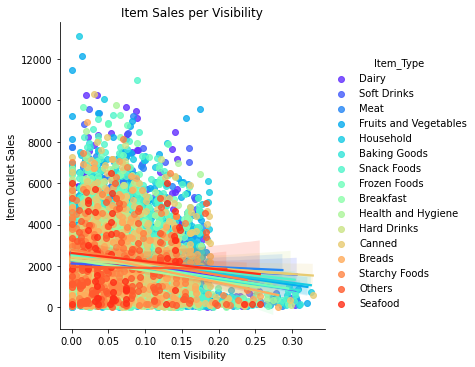

In [145]:
sns.lmplot(x= 'Item_Visibility', y='Item_Outlet_Sales', hue='Item_Type',palette='rainbow',
           data=df)
plt.title('Item Sales per Visibility')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.show()

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Item_Weight                8523 non-null   float64       
 1   Item_Fat_Content           8523 non-null   int64         
 2   Item_Visibility            8523 non-null   float64       
 3   Item_Type                  8523 non-null   object        
 4   Item_MRP                   8523 non-null   float64       
 5   Outlet_Establishment_Year  8523 non-null   datetime64[ns]
 6   Outlet_Size                8523 non-null   object        
 7   Outlet_Location_Type       8523 non-null   object        
 8   Outlet_Type                8523 non-null   object        
 9   Item_Outlet_Sales          8523 non-null   float64       
 10  Outlet_size                8523 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 7

No handles with labels found to put in legend.


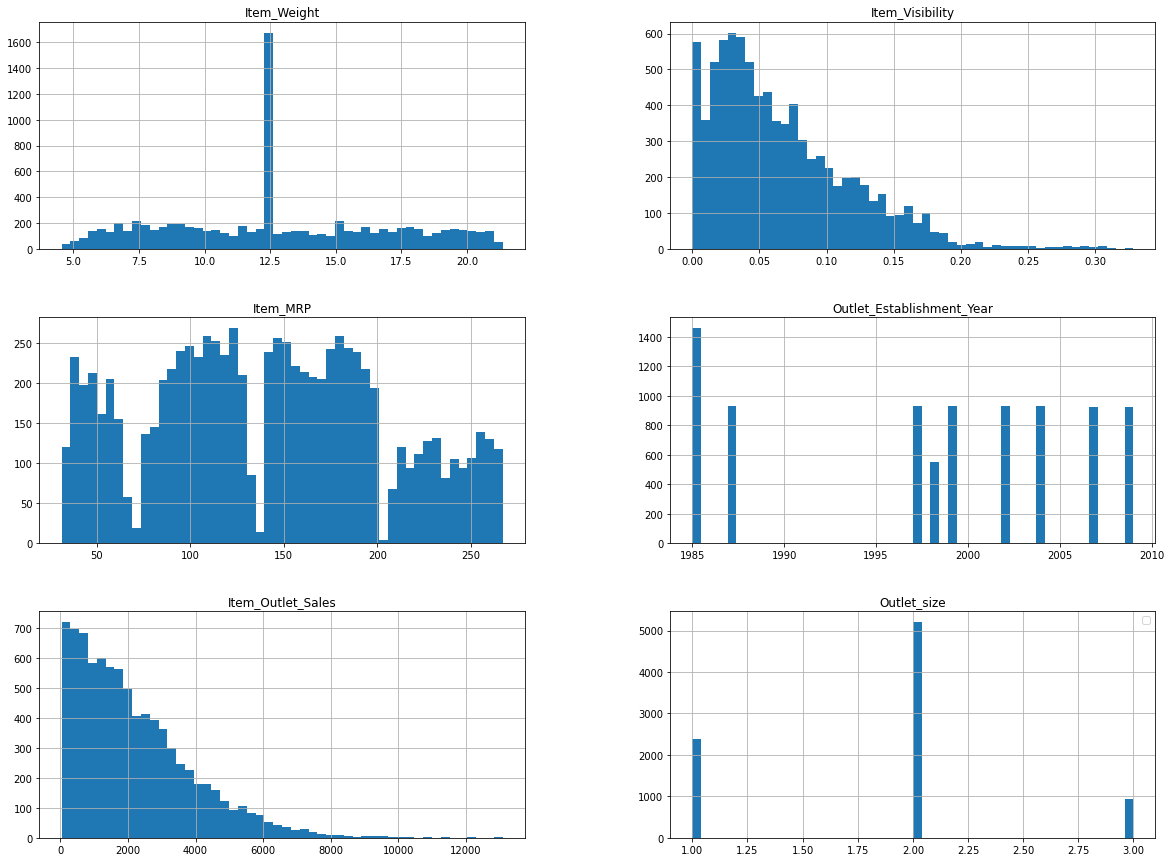

In [34]:
# looking at other numeric figs
df.hist(bins=50,figsize=(20,15))
plt.legend()

In [35]:
# changing year into datetime 
df['Outlet_Establishment_Year'] = pd.to_datetime(df['Outlet_Establishment_Year'], format='%Y')

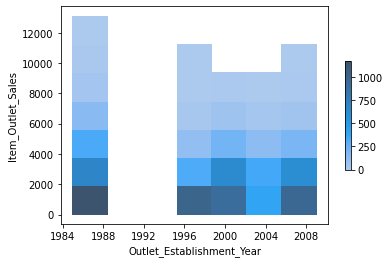

In [36]:
# see that most sales happend before internet; but we see in 2008 there is same peak as 1996.
sns.histplot(df, x ='Outlet_Establishment_Year', y='Item_Outlet_Sales',
              bins=7,
    cbar=True, cbar_kws=dict(shrink=.5),
);

# Categorical Visualization

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Item_Identifier            8523 non-null   object        
 1   Item_Weight                8523 non-null   float64       
 2   Item_Fat_Content           8523 non-null   object        
 3   Item_Visibility            8523 non-null   float64       
 4   Item_Type                  8523 non-null   object        
 5   Item_MRP                   8523 non-null   float64       
 6   Outlet_Identifier          8523 non-null   object        
 7   Outlet_Establishment_Year  8523 non-null   datetime64[ns]
 8   Outlet_Size                8523 non-null   object        
 9   Outlet_Location_Type       8523 non-null   object        
 10  Outlet_Type                8523 non-null   object        
 11  Item_Outlet_Sales          8523 non-null   float64       
 12  Outlet

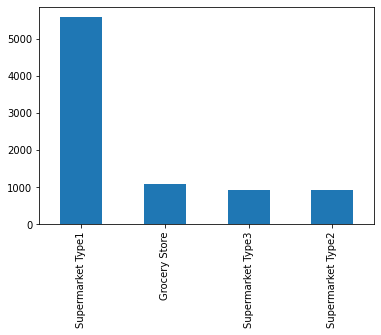

In [38]:
df.Outlet_Type.value_counts().plot.bar()

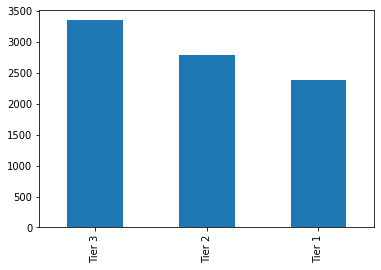

In [39]:
df.Outlet_Location_Type.value_counts().plot.bar()

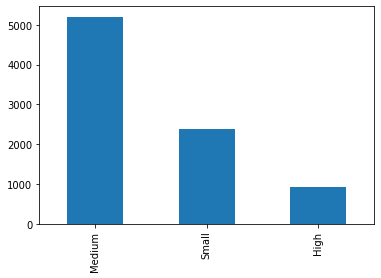

In [40]:
df.Outlet_Size.value_counts().plot.bar()

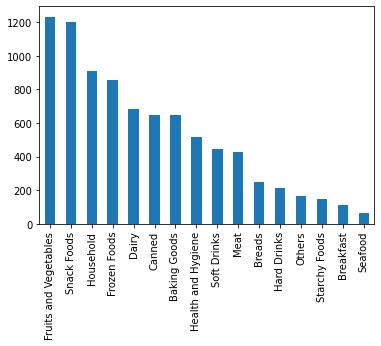

In [41]:
df.Item_Type.value_counts().plot.bar()

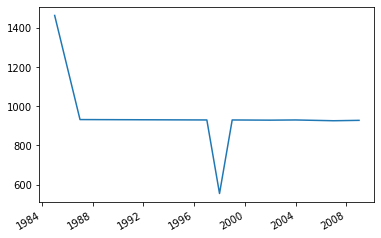

In [42]:
df.Outlet_Establishment_Year.value_counts().plot()

In [43]:
df.Item_Outlet_Sales.value_counts()

958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1278.3360    14
             ..
3167.8764     1
2226.4352     1
1684.4740     1
1574.6170     1
6692.6216     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [44]:


(
  df
 .query('Item_Outlet_Sales < 1000')  # row filter
 [['Outlet_Type', 'Outlet_Size',]]# column filter
 
)

,Outlet_Type,Outlet_Size
1,Supermarket Type2,Medium
3,Grocery Store,Medium
4,Supermarket Type1,High
5,Supermarket Type2,Medium
6,Supermarket Type1,High
...,...,...
8513,Supermarket Type1,Small
8514,Supermarket Type1,Medium
8516,Supermarket Type2,Medium
8519,Supermarket Type1,Medium


In [45]:
# We see that on average: supermarket type 3 is doing best in sales.
(df
 .pivot_table(index='Outlet_Type', values='Item_Outlet_Sales', aggfunc='mean')
 #.plot()
)

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [46]:
def q20(s):
  return s.quantile(.2)

(df
 .groupby('Outlet_Type')
 .agg({'Item_Outlet_Sales': ['min', 'max']})
 )

Item_Outlet_Sales            
                                min         max
Outlet_Type                                    
Grocery Store               33.2900   1775.6886
Supermarket Type1           73.2380  10256.6490
Supermarket Type2           69.2432   6768.5228
Supermarket Type3          241.6854  13086.9648

Text(0.5, 1.0, 'Sales Per Outlet Type')

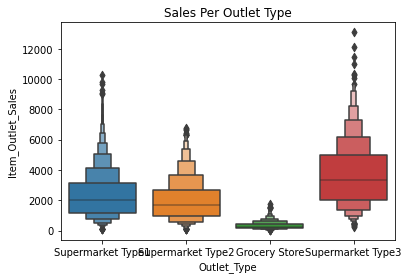

In [103]:
# We can see that on supermarket type3 is doing better sales, then the rest.
sns.boxenplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.title('Sales Per Outlet Type')

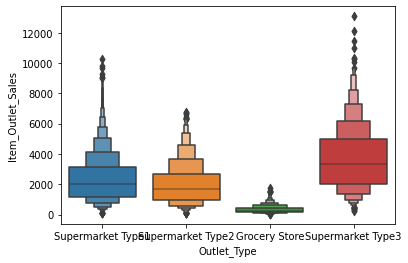

In [48]:
sns.boxenplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)

Text(0.5, 1.0, 'Items Sold Per Outype & Outlet Size')

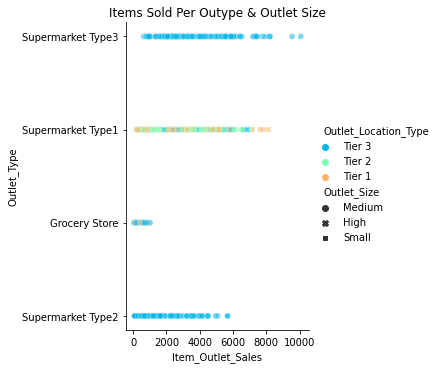

In [114]:
# Here we see that store supermarket type 3, is both tier 3 & is medium size.
sns.relplot(x='Item_Outlet_Sales', y='Outlet_Type', data=df.sample(1000),
            alpha=.5, style='Outlet_Size', hue='Outlet_Location_Type', #palette='rainbow'
            palette='rainbow')

plt.title('Sales Per Outype & Outlet Size')

# Data pre-prcoessing

In [50]:
df = df.drop(columns=['Item_Identifier', 'Outlet_Identifier'])

In [51]:
numerical_cols = df.columns[df.dtypes == 'float64'].tolist()


numerical_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Item_Outlet_Sales',
 'Outlet_size']

In [52]:
categorical_cols = df.columns[df.dtypes == 'object'].tolist()

categorical_cols



['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [53]:

multi_valued_colmmns = df[categorical_cols].nunique()[df[categorical_cols].nunique() > 2].index.tolist()

multi_valued_colmmns



['Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [54]:
single_valued_colmmns = df[categorical_cols].nunique()[df[categorical_cols].nunique() == 1].index.tolist()
single_valued_colmmns

[]

In [55]:
binary_colmmns = df[categorical_cols].nunique()[df[categorical_cols].nunique() == 2].index.tolist()
binary_colmmns

['Item_Fat_Content']

In [56]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Transform binary_columns
for column in binary_colmmns :
  df[column] = LabelEncoder().fit_transform(df[column])

In [57]:
df.Item_Fat_Content.value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [58]:
# Transform multivalued columns
dummies_adjusted_data = pd.get_dummies(data = df, columns=multi_valued_colmmns, drop_first=True)
dummies_adjusted_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_size,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0,0.016047,249.8092,1999-01-01,3735.1380,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,5.920,1,0.019278,48.2692,2009-01-01,443.4228,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
2,17.500,0,0.016760,141.6180,1999-01-01,2097.2700,2.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,19.200,1,0.000000,182.0950,1998-01-01,732.3800,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,8.930,0,0.000000,53.8614,1987-01-01,994.7052,3.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1987-01-01,2778.3834,3.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
8519,8.380,1,0.046982,108.1570,2002-01-01,549.2850,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
8520,10.600,0,0.035186,85.1224,2004-01-01,1193.1136,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0
8521,7.210,1,0.145221,103.1332,2009-01-01,1845.5976,2.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0


In [59]:
# Z-Score normalization
numerical_columns = dummies_adjusted_data[numerical_cols]
scaled_numerical = numerical_columns.div(numerical_columns.mean(), axis=1)
scaled_numerical.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_size
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,1.000000,1.000000,1.000000,1.000000,1.000000
std,0.329907,0.780224,0.441690,0.782335,0.328197
min,0.355487,0.000000,0.221926,0.015262,0.546697
25%,0.726582,0.408115,0.665470,0.382456,0.546697
50%,0.983344,0.815504,1.014327,0.822601,1.093393
75%,1.248691,1.430249,1.316689,1.421772,1.093393
max,1.666222,4.965687,1.892922,5.999648,1.640090


In [60]:
#Scaling Numerical columns

std = StandardScaler()

scaled = std.fit_transform(dummies_adjusted_data[numerical_cols])
scaled = pd.DataFrame(scaled,columns=numerical_cols)
scaled

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_size
0,-0.831187,-0.970732,1.747454,0.910601,0.284581
1,-1.630810,-0.908111,-1.489023,-1.018440,0.284581
2,1.108727,-0.956917,0.010040,-0.049238,0.284581
3,1.510904,-1.281758,0.660050,-0.849103,0.284581
4,-0.918719,-1.281758,-1.399220,-0.695373,1.950437
...,...,...,...,...,...
8518,-1.407246,-0.181193,1.180783,0.349915,1.950437
8519,-1.048835,-0.371154,-0.527301,-0.956402,0.284581
8520,-0.523639,-0.599784,-0.897208,-0.579100,-1.381274
8521,-1.325628,1.532880,-0.607977,-0.196725,0.284581


In [61]:
scaled.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_size
count,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03
mean,-1.015457e-16,1.822365e-16,-1.637654e-16,1.638435e-16,-3.088251e-16
std,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00
min,-1.953734e+00,-1.281758e+00,-1.761688e+00,-1.258790e+00,-1.381274e+00
25%,-8.288209e-01,-7.586531e-01,-7.574307e-01,-7.894057e-01,-1.381274e+00
50%,-5.048970e-02,-2.364792e-01,3.243893e-02,-2.267687e-01,2.845812e-01
75%,7.538647e-01,5.514755e-01,7.170372e-01,5.391513e-01,2.845812e-01
max,2.019540e+00,5.083050e+00,2.021724e+00,6.391045e+00,1.950437e+00


In [62]:
#dropping original values merging scaled values for numerical columns

dummies_adjusted_data = dummies_adjusted_data.copy()

data = dummies_adjusted_data.drop(columns = numerical_cols,axis = 1)

data = data.merge(scaled_numerical,left_index=True,right_index=True,how = "left")

data = data.drop(['Outlet_Establishment_Year'],axis = 1)

data

,Item_Fat_Content,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_size
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.725802,0.242656,1.771787,1.712354,1.093393
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0.462016,0.291511,0.342352,0.203285,1.093393
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1.365756,0.253434,1.004434,0.961482,1.093393
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1.498429,0.000000,1.291520,0.335756,1.093393
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0.696926,0.000000,0.382015,0.456017,1.640090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0.535766,0.858637,1.521509,1.273735,1.640090
8519,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0.654002,0.710434,0.767110,0.251817,1.093393
8520,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0.827258,0.532061,0.603736,0.546976,0.546697
8521,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0.562691,2.195920,0.731479,0.846104,1.093393


# Multicollinearity

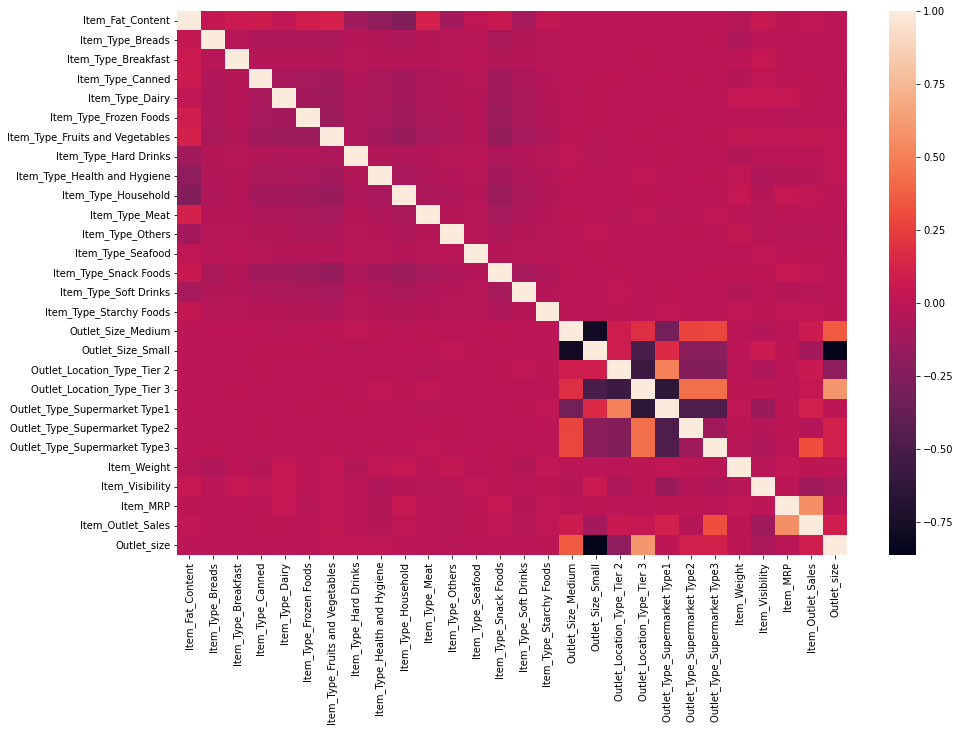

In [63]:
corr_matrix = data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix)
plt.show()

In [64]:
cols_to_melt = corr_matrix.columns
corr_matrix = corr_matrix.reset_index()

In [65]:
corr_matrix_melted = corr_matrix.melt( id_vars='index', value_vars=cols_to_melt)
corr_matrix_melted = corr_matrix_melted[corr_matrix_melted['index'] != corr_matrix_melted['variable']]
corrlations_above_threshold = corr_matrix_melted[corr_matrix_melted.value.abs() > .8]
columns_to_drop = corrlations_above_threshold['index'].to_list()
columns_to_drop

['Outlet_size', 'Outlet_Size_Small']

In [66]:
data.drop(columns=columns_to_drop, inplace=True)

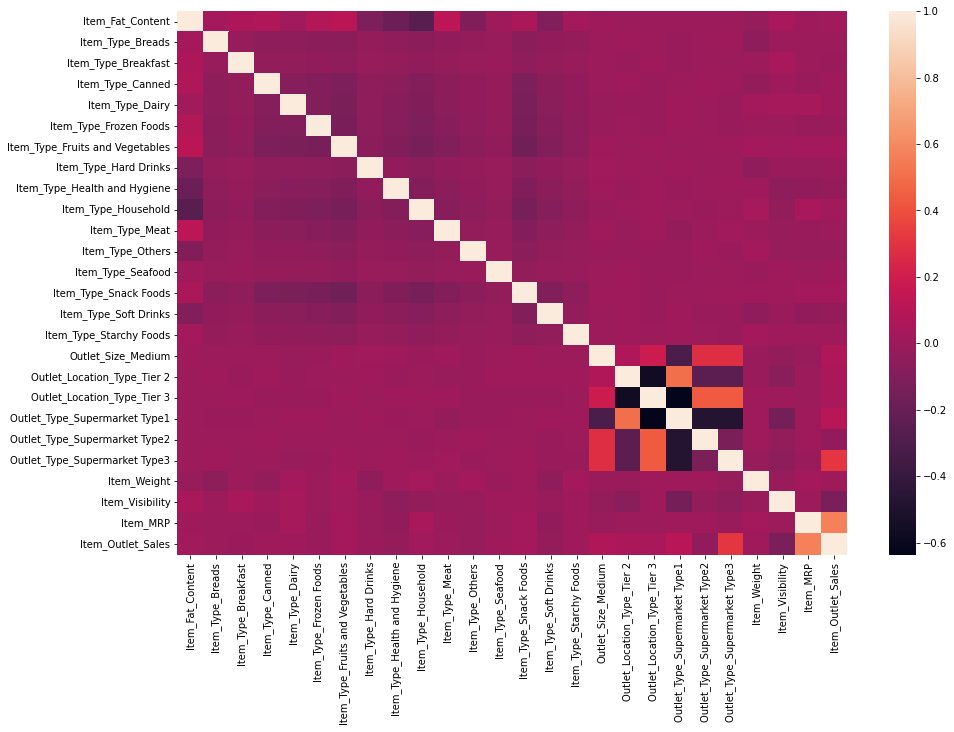

In [67]:
corr_matrix = data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix)
plt.show()

In [68]:
data.head()

,Item_Fat_Content,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.725802,0.242656,1.771787,1.712354
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0.462016,0.291511,0.342352,0.203285
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1.365756,0.253434,1.004434,0.961482
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1.498429,0.000000,1.291520,0.335756
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0.696926,0.000000,0.382015,0.456017


In [69]:
y = data.pop('Item_Outlet_Sales')

In [70]:
X = data

In [71]:
X = sm.add_constant(X)

In [72]:
X.head()

,const,Item_Fat_Content,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP
0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.725802,0.242656,1.771787
1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0.462016,0.291511,0.342352
2,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1.365756,0.253434,1.004434
3,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1.498429,0.000000,1.291520
4,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0.696926,0.000000,0.382015


In [73]:
X.shape

(8523, 26)

# Linear Model

In [74]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


# Here we see that the important features are: MRP &  Outlet_Type_Supermarket Type: are important features
# play an import role with our target: sales
# reason is because these features have below: 0.05 p-values and t-stats above 2 or below -2, which shows that it is significant.

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     437.3
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:21:08   Log-Likelihood:                -6476.6
No. Observations:                8523   AIC:                         1.301e+04
Df Residuals:                    8497   BIC:                         1.319e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [76]:
X_train.head()

,const,Item_Fat_Content,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP
4776,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1.276006,0.447065,1.818991
7510,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1.190158,0.000000,1.275001
5828,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0.963833,2.399983,1.115622
5327,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.622394,0.221200,0.583895
4810,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1.510136,0.251696,0.857560


In [77]:
# create an instance of model
model = LinearRegression()

In [78]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# R^2 Score


In [79]:
 # To look and acceess the R^2: for both training and test set
model.score(X_train, y_train)

0.5606111394577441

In [80]:
# # To look and acceess the R^2: for both test and y test set
# # test data model has never seen.
model.score(X_test, y_test)

0.5656987399943303

In [81]:
# # prediction, then save on y_pred_test
y_pred_test = model.predict(X_test)

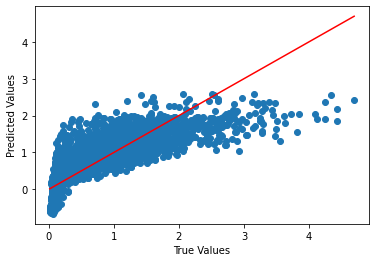

In [82]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

m = y_test.min()
M = y_test.max()

plt.plot((m, M), (m, M), color='red');

# MSE Score

In [83]:
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, model.predict(X_train))))

print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

Training RMSE: 0.5227779377108871
Testing RMSE: 0.5018297629825529


# Splitting data for tree based models




In [84]:
dummies_adjusted_data = pd.get_dummies(data = df, columns=multi_valued_colmmns)
dummies_adjusted_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_size,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0,0.016047,249.8092,1999-01-01,3735.1380,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
1,5.920,1,0.019278,48.2692,2009-01-01,443.4228,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,17.500,0,0.016760,141.6180,1999-01-01,2097.2700,2.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
3,19.200,1,0.000000,182.0950,1998-01-01,732.3800,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4,8.930,0,0.000000,53.8614,1987-01-01,994.7052,3.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1987-01-01,2778.3834,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
8519,8.380,1,0.046982,108.1570,2002-01-01,549.2850,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
8520,10.600,0,0.035186,85.1224,2004-01-01,1193.1136,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
8521,7.210,1,0.145221,103.1332,2009-01-01,1845.5976,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0


In [85]:
y = dummies_adjusted_data['Item_Outlet_Sales']

remove = ['Item_Outlet_Sales', 'Outlet_Establishment_Year']

X = dummies_adjusted_data[dummies_adjusted_data.columns.difference(remove)]


In [86]:
X.shape

(8523, 31)

In [87]:
X.head()

,Item_Fat_Content,Item_MRP,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Item_Visibility,Item_Weight,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_size
0,0,249.8092,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.016047,9.30,1,0,0,0,1,0,0,1,0,0,2.0
1,1,48.2692,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.019278,5.92,0,0,1,0,1,0,0,0,1,0,2.0
2,0,141.6180,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.016760,17.50,1,0,0,0,1,0,0,1,0,0,2.0
3,1,182.0950,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.000000,19.20,0,0,1,0,1,0,1,0,0,0,2.0
4,0,53.8614,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.000000,8.93,0,0,1,1,0,0,0,1,0,0,3.0


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state=42)

In [89]:
X_train.head()

,Item_Fat_Content,Item_MRP,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Item_Visibility,Item_Weight,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_size
1686,0,45.0060,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.013920,9.80,0,1,0,0,1,0,0,1,0,0,2.0
6096,0,118.4150,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.014505,7.26,0,1,0,0,1,0,0,1,0,0,2.0
898,1,131.9942,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.096644,15.10,0,1,0,0,1,0,0,1,0,0,2.0
1211,0,145.6102,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.089333,10.00,0,1,0,0,1,0,0,1,0,0,2.0
7082,0,173.8054,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.037794,13.10,0,1,0,0,1,0,0,1,0,0,2.0


# Decision Tree


In [90]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=3)
dt_model = dt_model.fit(X_train, y_train)
print(dt_model)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


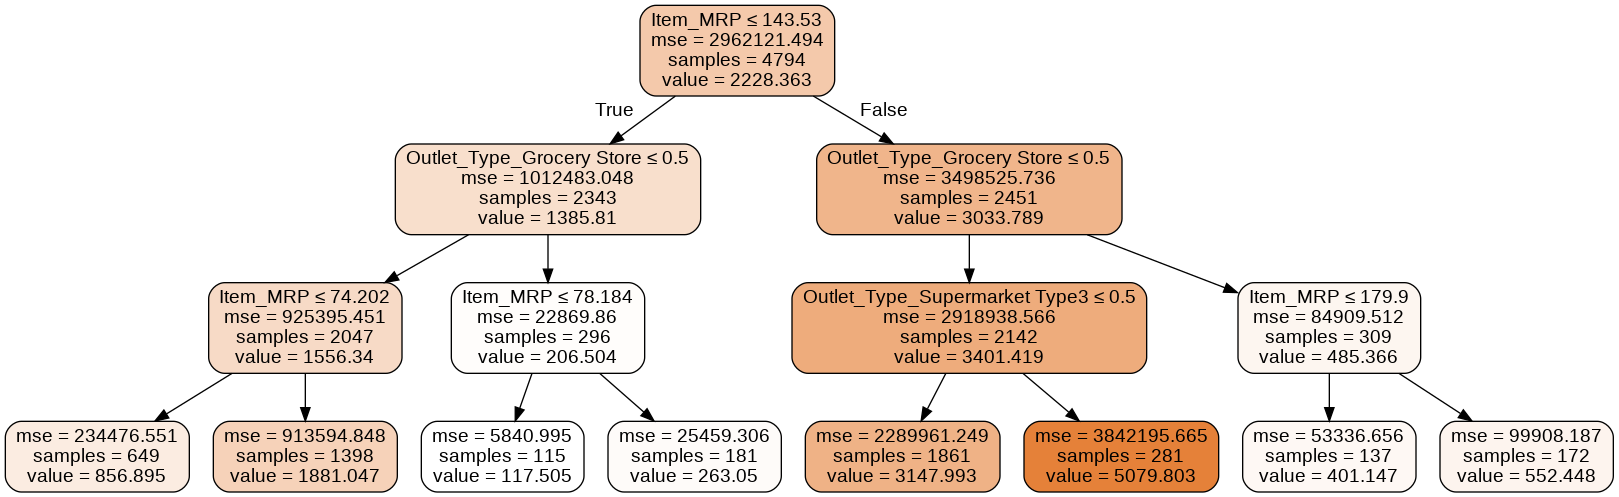

In [91]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_train.columns.values.tolist())
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# We can see the "questions" our tree is asking: such as the mrp outlet_type

In [92]:
# 3) Optimize the max_depth based on the R2 score.

# List of values to try for max_depth:
max_depth_range = list(range(2, 36)) # will try every value between 2 and 36
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

print(r2)

[0.43379452802473917, 0.5248302156200373, 0.5844704748483116, 0.5991578058775469, 0.5781592913693867, 0.5670555453811822, 0.5455102855187964, 0.532198049804608, 0.5283251231570323, 0.4782230365358198, 0.45863883574590625, 0.40725570950553575, 0.36417337148341367, 0.34987543688989375, 0.33702011706197177, 0.28211813820897647, 0.23499299383854122, 0.2369734156342266, 0.20442659055967696, 0.1920622141005991, 0.1950232418540746, 0.1902830763334603, 0.16915286776062666, 0.17292972413993857, 0.16408708553812013, 0.17612689463595, 0.14058959341360877, 0.15438527328633278, 0.13991341262840862, 0.16850132234936166, 0.13744386447375223, 0.13744386447375223, 0.13744386447375223, 0.13744386447375223]


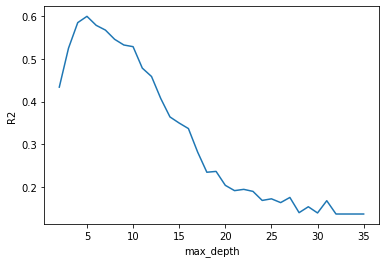

In [93]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');


In [94]:
# What is the r2 of your final model on the training set and on the test set?

# Let's run the model with our optimized value for max_depth, which is 7

dec_tree_5 = DecisionTreeRegressor(max_depth = 5)
dec_tree_5.fit(X_train, y_train)
train_5_score = dec_tree_5.score(X_train, y_train)
test_5_score = dec_tree_5.score(X_test, y_test)

print(train_5_score)
print(test_5_score)

0.600766866306908
0.5991578058775469


In [95]:
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, dec_tree.predict(X_train))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, dec_tree.predict(X_test))))

Training RMSE: 0.0
Testing RMSE: 1542.651220261792


# Bagged Tree Model

In [96]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
# Bagged trees regressor
bt = BaggingRegressor(random_state=42,n_estimators=100,bootstrap_features=True)
bt.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
                 max_features=1.0, max_samples=1.0, n_estimators=100,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [97]:
# training R2

print(bt.score(X_train, y_train))

# testing R2

bt_test_score = bt.score(X_test, y_test)

print(bt_test_score)

0.9033925770556427
0.5065998793478235


In [98]:
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, bt.predict(X_train))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, bt.predict(X_test))))

Training RMSE: 534.9419818826972
Testing RMSE: 1166.7389282441973


 # Random Forest Model
   

In [99]:
rf_model = RandomForestRegressor(random_state=42,n_estimators=500,max_depth=5,min_samples_leaf=6)  

print(rf_model)

rf_model.fit(X_train, y_train)  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [100]:
# training R2
print(rf_model.score(X_train, y_train))

# testing R2

rf_model_test = rf_model.score(X_test, y_test)

print(rf_model_test)

0.6062882775657896
0.6050043853937106


In [101]:
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, rf_model.predict(X_train))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, rf_model.predict(X_test))))

Training RMSE: 1079.9175688220637
Testing RMSE: 1043.927166751581


# Most Important Features

In [102]:
# Feature importance
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',    
                                                                        ascending=False)
feature_importances
                                    

,importance
Item_MRP,0.540500
Outlet_Type_Grocery Store,0.317607
Outlet_Type_Supermarket Type3,0.134174
Item_Visibility,0.004141
Item_Weight,0.000772
Item_Type_Fruits and Vegetables,0.000582
Outlet_Type_Supermarket Type1,0.000483
Outlet_Type_Supermarket Type2,0.000286
Item_Fat_Content,0.000277
Item_Type_Snack Foods,0.000259


# Model Evaluation

## Comparing the 4 models: R^2 & RMSE

## Linear Regression: 0.5656%, RMSE: 0.5018

## Decision tree score: 0.5991%, RMSE:1542.65

## Bagged tree score: 0.5065%, RMSE: 1166.73

## Random forest score: 0.6050%, RMSE:1043.92

### **In this case: Random Forest did the best with an R^2 score of 60.50% and a root mean square error of 1043.92**